In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale=2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [66]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

# EDA

In [67]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [68]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [69]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [70]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of Nan value: {:.2f}%'.format(col, df_train[col].isnull().sum()/df_train[col].shape[0] * 100)
    print(msg)

column: PassengerId	 Percent of Nan value: 0.00%
column:   Survived	 Percent of Nan value: 0.00%
column:     Pclass	 Percent of Nan value: 0.00%
column:       Name	 Percent of Nan value: 0.00%
column:        Sex	 Percent of Nan value: 0.00%
column:        Age	 Percent of Nan value: 19.87%
column:      SibSp	 Percent of Nan value: 0.00%
column:      Parch	 Percent of Nan value: 0.00%
column:     Ticket	 Percent of Nan value: 0.00%
column:       Fare	 Percent of Nan value: 0.00%
column:      Cabin	 Percent of Nan value: 77.10%
column:   Embarked	 Percent of Nan value: 0.22%


In [71]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of Nan value: {:.2f}%'.format(col, df_test[col].isnull().sum()/df_test[col].shape[0] * 100)
    print(msg)

column: PassengerId	 Percent of Nan value: 0.00%
column:     Pclass	 Percent of Nan value: 0.00%
column:       Name	 Percent of Nan value: 0.00%
column:        Sex	 Percent of Nan value: 0.00%
column:        Age	 Percent of Nan value: 20.57%
column:      SibSp	 Percent of Nan value: 0.00%
column:      Parch	 Percent of Nan value: 0.00%
column:     Ticket	 Percent of Nan value: 0.00%
column:       Fare	 Percent of Nan value: 0.24%
column:      Cabin	 Percent of Nan value: 78.23%
column:   Embarked	 Percent of Nan value: 0.00%


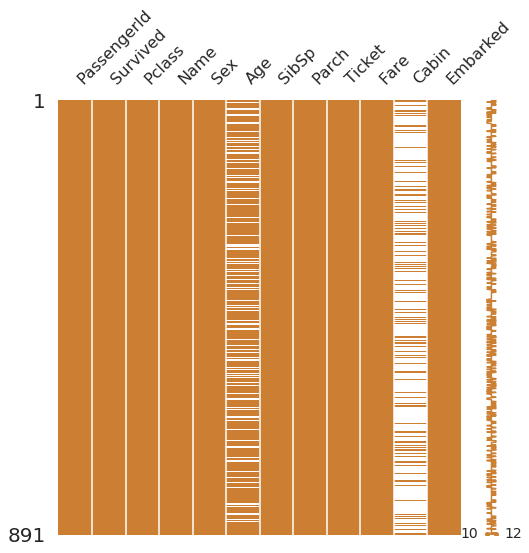

In [72]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8),color=(0.8,0.5,0.2))

In [73]:
df_train.iloc[:,1]

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

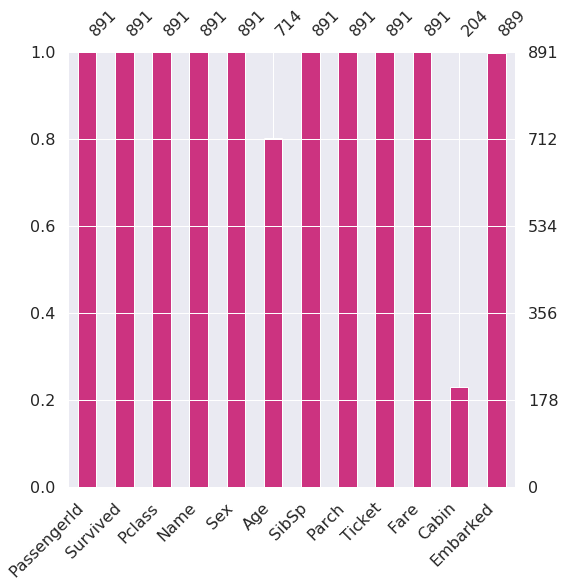

In [74]:
msno.bar(df=df_train.iloc[:,:],figsize=(8,8),color=(0.8,0.2,0.5))

In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


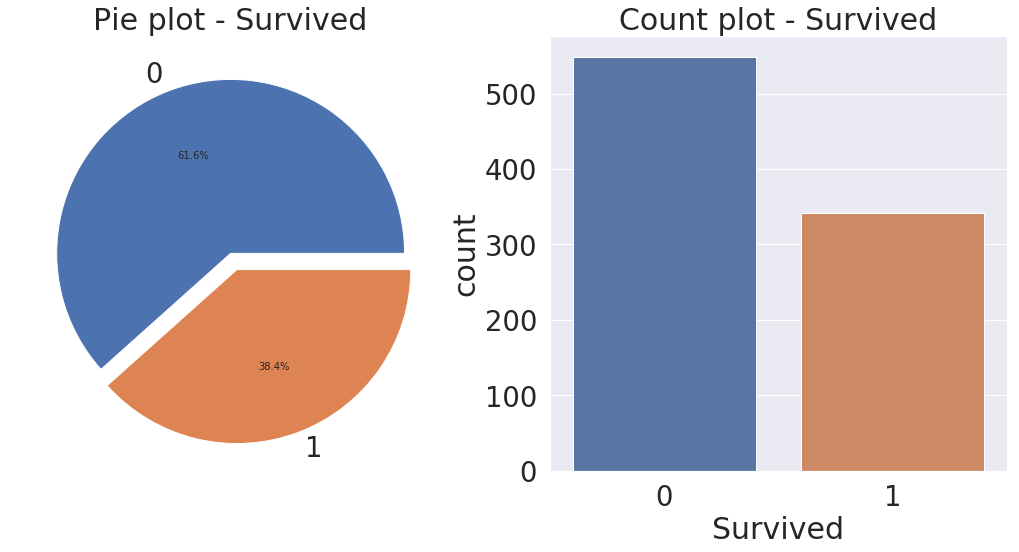

In [76]:
f, ax = plt.subplots(1,2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0])
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_train)
ax[1].set_title('Count plot - Survived')

plt.show()

In [77]:
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index=True).count()
#Pclass 그룹 별 데이터 개수

,Survived
Pclass,
1,216
2,184
3,491


In [78]:
df_train[['Pclass','Survived']].groupby(['Pclass']).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [79]:
pd.crosstab(df_train['Pclass'],df_train['Survived'],margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [80]:
df_train[['Pclass','Survived']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


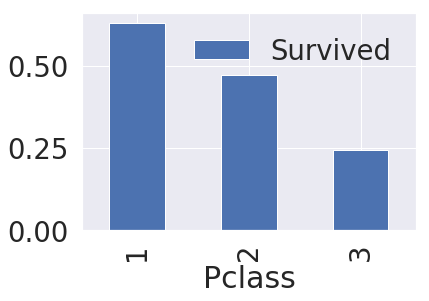

In [81]:
df_train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar()

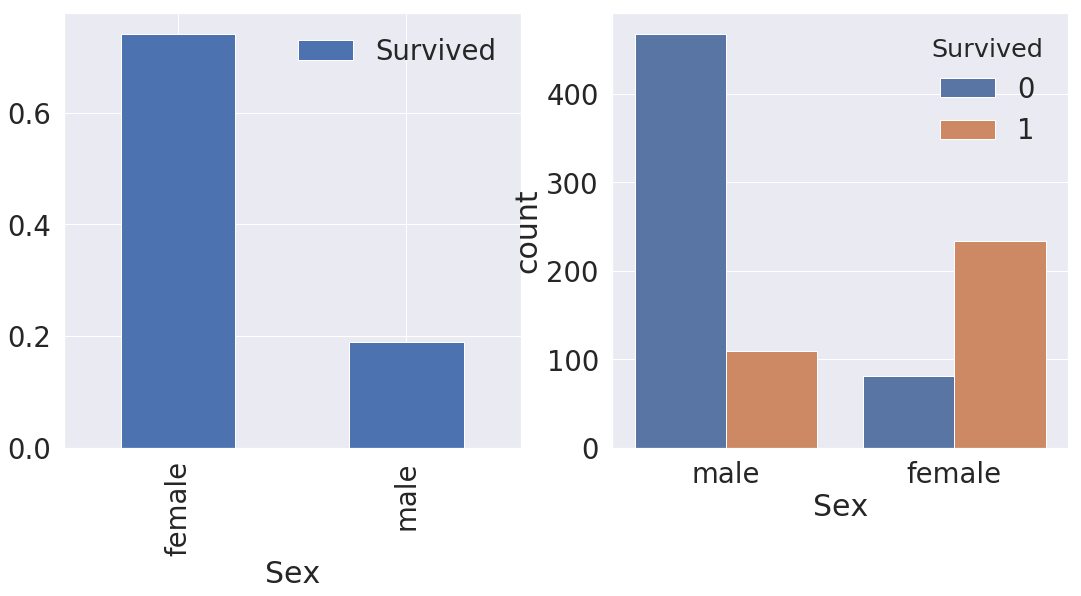

In [82]:
f,ax = plt.subplots(1,2,figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])

sns.countplot('Sex',hue='Survived',data=df_train,ax=ax[1])
plt.show()

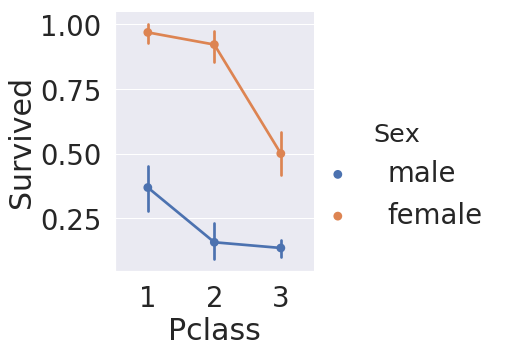

In [83]:
sns.factorplot('Pclass','Survived',hue='Sex',data=df_train)

In [84]:
print('제일 나이 많은 탑승객:{:.1f} Years'.format(df_train['Age'].max()))
print('제일 나이 어린 탑승객:{:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이:{:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객:80.0 Years
제일 나이 어린 탑승객:0.4 Years
탑승객 평균 나이:29.7 Years


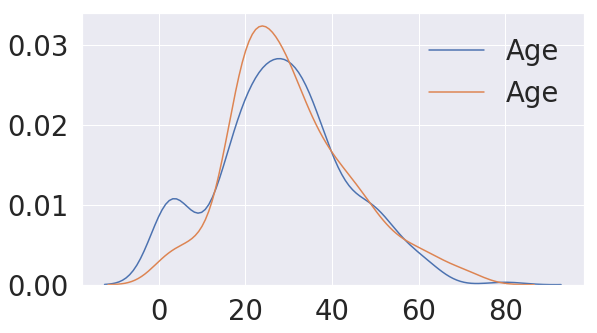

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax=ax)
plt.show()

In [86]:
df_train[df_train['Survived']==1]['Age']

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

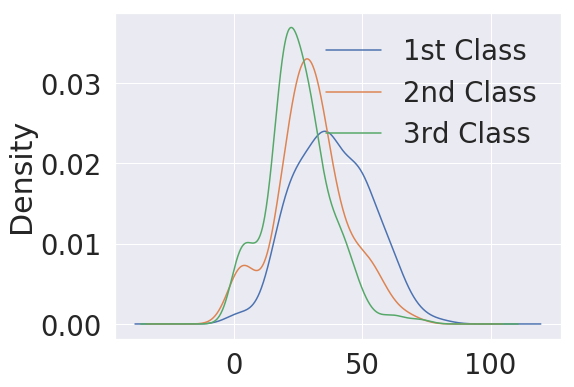

In [87]:
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass']==1].plot(kind='kde')
df_train['Age'][df_train['Pclass']==2].plot(kind='kde')
df_train['Age'][df_train['Pclass']==3].plot(kind='kde')
plt.legend(['1st Class','2nd Class','3rd Class'])

In [88]:
age_survive_ratio=[]
for age in range(1,80):
    age_survive_ratio.append(
        df_train[df_train['Age']==age][df_train['Survived']==1]['Age'].count()/
        df_train['Age'][df_train['Age']==age].count())

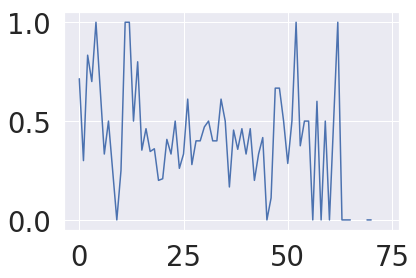

In [89]:
plt.plot(age_survive_ratio)

In [90]:
df_train['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

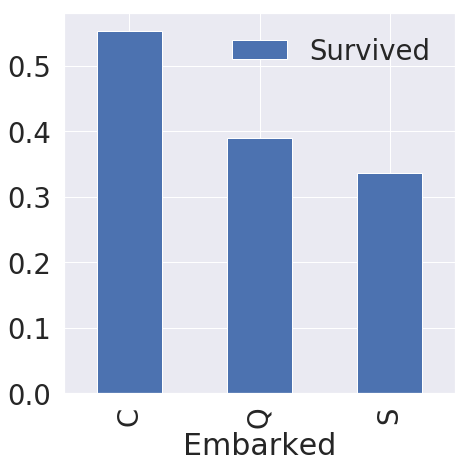

In [91]:
f,ax=plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked']).mean().plot.bar(ax=ax)

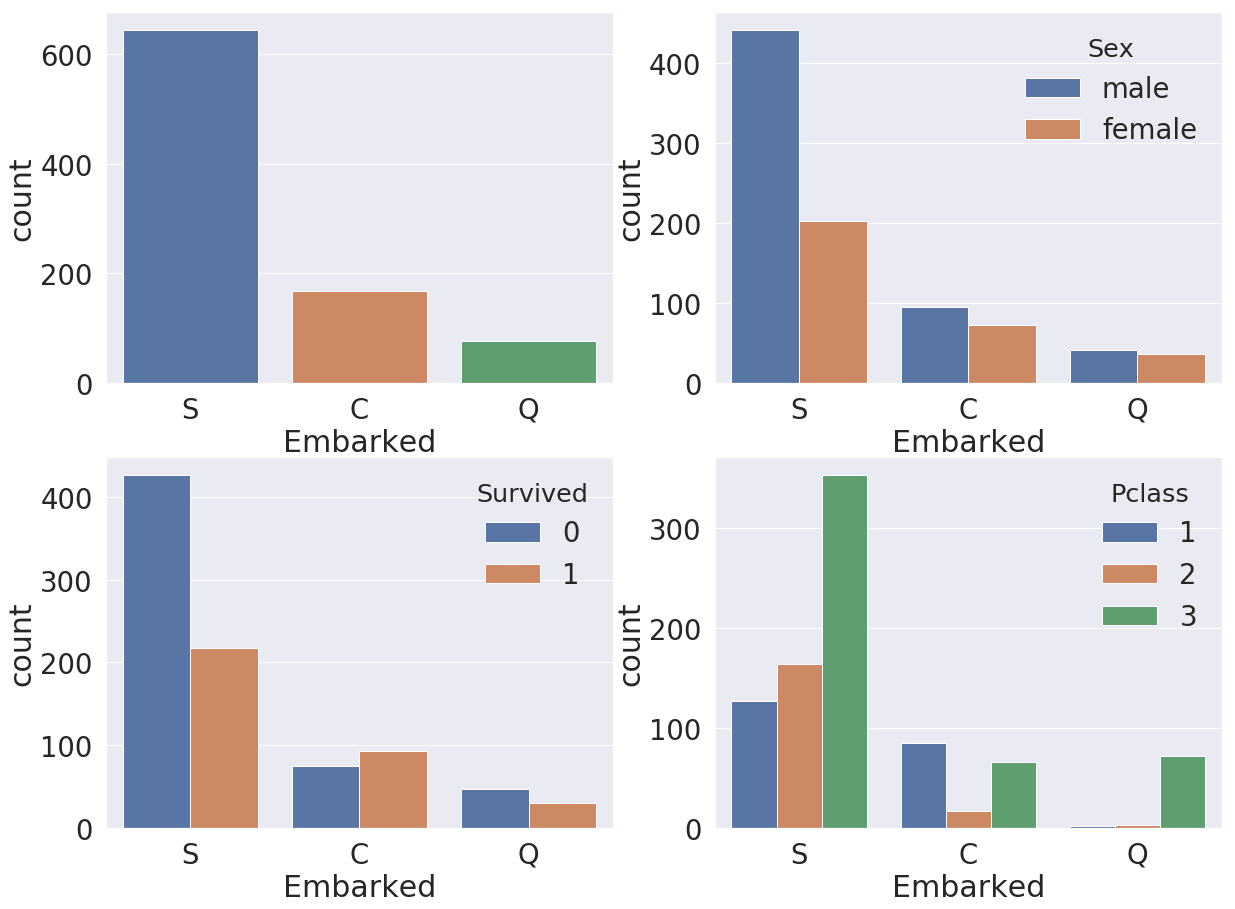

In [92]:
f,ax=plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked',data=df_train,ax=ax[0,0])

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])

sns.countplot('Embarked', hue='Survived',data=df_train , ax=ax[1,0])

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])

In [93]:
# new feature

df_train['FamilySize'] = df_train['SibSp']+df_train['Parch']+1
df_test['FamilySize'] = df_test['SibSp']+df_train['Parch']+1

print(df_train['FamilySize'].min(),df_train['FamilySize'].max(),df_train['FamilySize'].mean())
print(df_test['FamilySize'].min(),df_test['FamilySize'].max(),df_train['FamilySize'].mean())

1 11 1.904601571268238
1.0 13.0 1.904601571268238


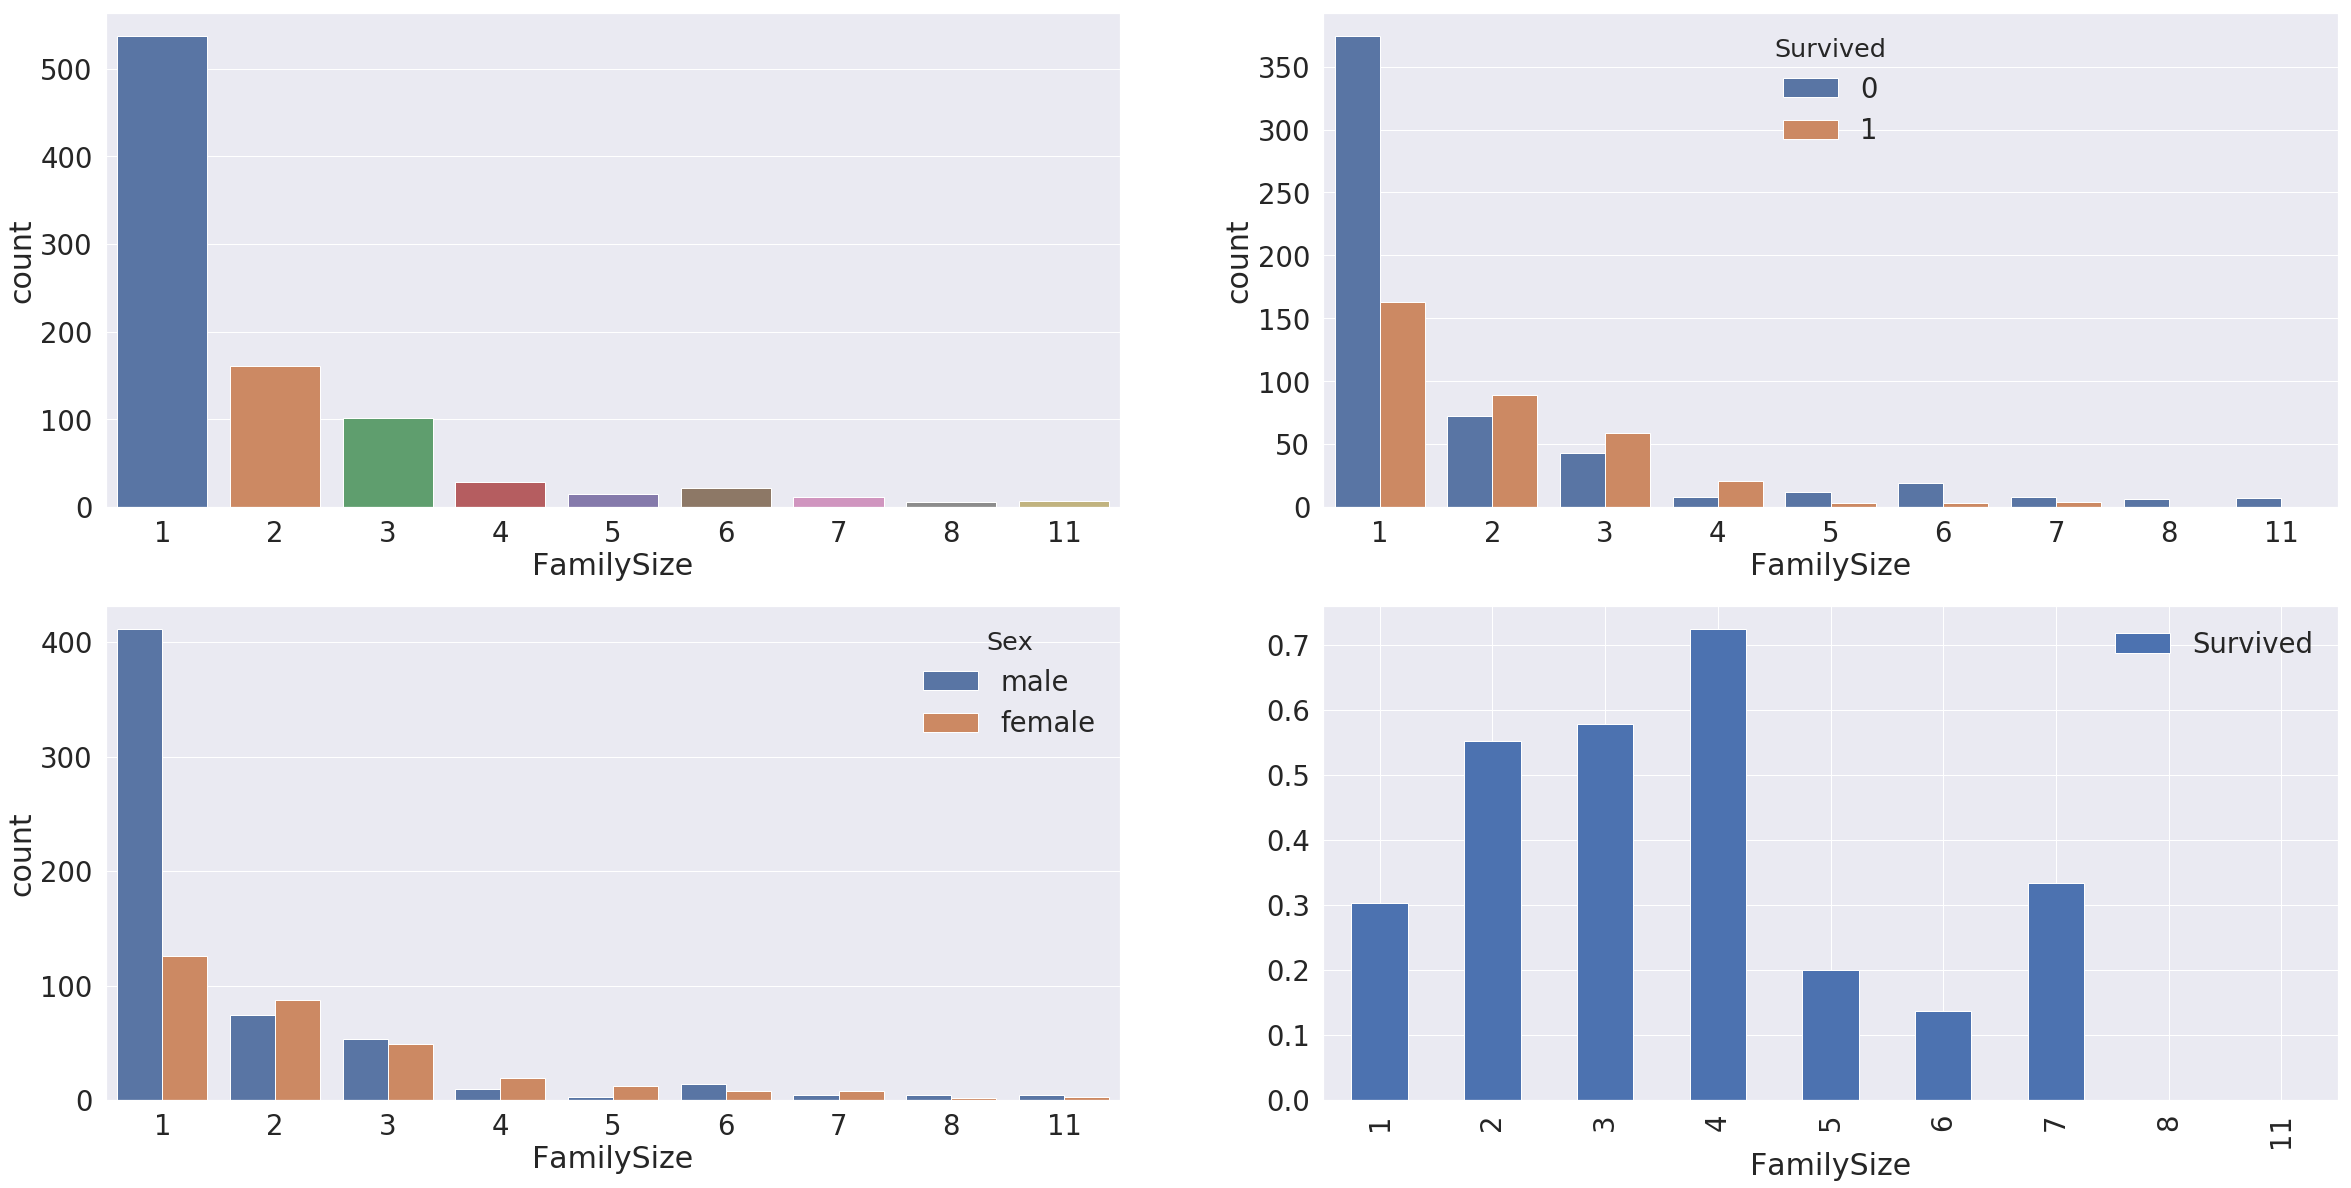

In [94]:
f,ax = plt.subplots(2,2,figsize=(40,20))
sns.countplot('FamilySize', data=df_train,ax=ax[0,0])

sns.countplot('FamilySize',data=df_train,hue='Survived',ax=ax[0,1])

sns.countplot('FamilySize',data=df_train,hue='Sex',ax=ax[1,0])

df_train[['FamilySize','Survived']].groupby(['FamilySize']).mean().plot.bar(ax=ax[1,1])

plt.show()

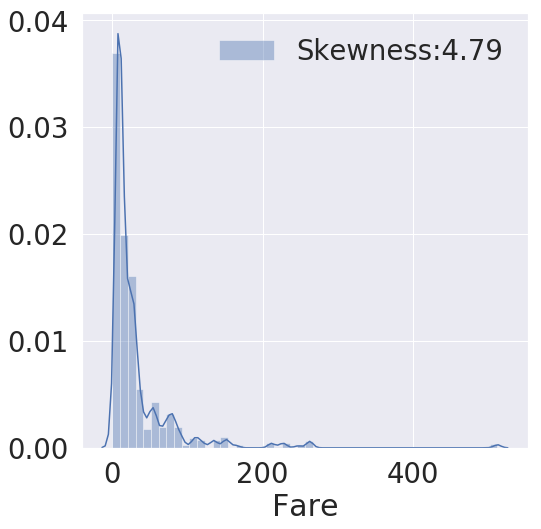

In [95]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b',label='Skewness:{:.2f}'.format(df_train['Fare'].skew(),ax=ax))
g = g.legend(loc='best')

In [96]:
# null value change to average
df_test.loc[df_test.Fare.isnull(),'Fare'] = df_test['Fare'].mean()

In [97]:
df_train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [98]:
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)

In [99]:
df_train['Fare'].describe()

count    891.000000
mean       2.893846
std        1.002899
min        0.000000
25%        2.068177
50%        2.670985
75%        3.433987
max        6.238967
Name: Fare, dtype: float64

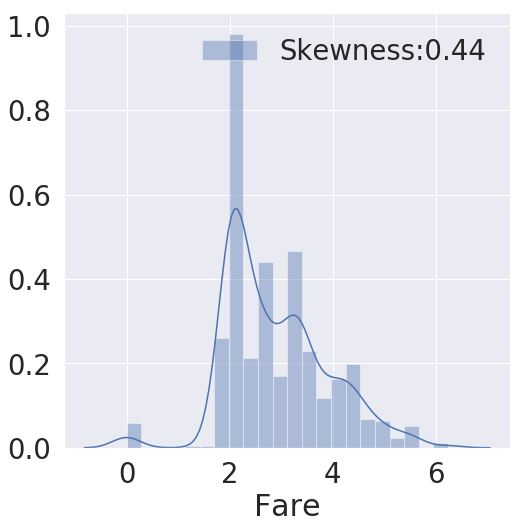

In [100]:
fig,ax = plt.subplots(1,1,figsize=(8,8))
g = sns.distplot(df_train['Fare'],color='b',label='Skewness:{:.2f}'.format(df_train['Fare'].skew(),ax=ax))
g = g.legend(loc='best')

In [101]:
df_train["Cabin"].isnull().sum()/df_train.shape[0]
# almost 80% is null value

0.7710437710437711

In [102]:
df_train['Ticket'].value_counts()

CA. 2343           7
1601               7
347082             7
347088             6
3101295            6
                  ..
237798             1
112058             1
248731             1
350026             1
SC/AH Basle 541    1
Name: Ticket, Length: 681, dtype: int64

# Feature engineering
특성 공학을 통해 다양 피쳐를 만드시고, 정제하실 텐데
자기가 생각한 가정이 항상 타당한지 생각하시고 진행해 주시길 바랍니다!
아무리 좋은 모델도, 안좋은 데이터가 들어오면 안좋은 결과로 나오기 마련이니까요.

가장 먼저, dataset 에 존재하는 null data를 채우려고 합니다.
아무 숫자로 채울 수는 없고, null data 를 포함하는 feature 의 statistics 를 참고하거나,
다른 아이디어를 짜내어 채울 수 있습니다.

null data 를 어떻게 채우느냐에 따라 모델의 성능이 좌지우지될 수 있기 때문에, 신경써줘야할 부분입니다.

특히, Feature engineering 은 실제 모델의 학습에 쓰려고 하는 것이므로,
train 뿐만 아니라 test 도 똑같이 적용해주어야 합니다. 잊지맙시다.

In [103]:
df_train['Age'].isnull().sum()

177

In [104]:
df_train['Initial']= df_train.Name.str.extract('([A-Za-z]+)\.')
df_test['Initial']= df_test.Name.str.extract('([A-Za-z]+)\.')

In [105]:
pd.crosstab(df_train['Initial'],df_train['Sex']).T.style.background_gradient(cmap='summer')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [106]:
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [107]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


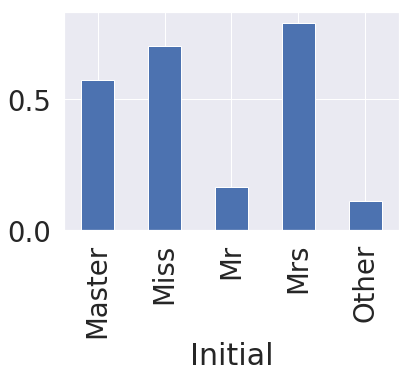

In [108]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

In [109]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [110]:
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'),'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'),'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'),'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'),'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'),'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'),'Age'] = 36
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'),'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'),'Age'] = 46

In [111]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
Initial          0
dtype: int64

In [112]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
FamilySize       0
Initial          0
dtype: int64

In [113]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


In [114]:
df_train['Embarked'].fillna('S', inplace=True)

In [115]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
FamilySize       0
Initial          0
dtype: int64

In [116]:
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7    
    
df_train['Age_cat'] = df_train['Age'].apply(category_age)
df_test['Age_cat'] = df_test['Age'].apply(category_age)

In [117]:
df_train.groupby(['Age_cat'])['PassengerId'].count()

Age_cat
0     66
1    102
2    256
3    304
4     89
5     48
6     19
7      7
Name: PassengerId, dtype: int64

In [118]:
df_train['Initial'] = df_train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
df_test['Initial'] = df_test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [119]:
df_train['Embarked'] = df_train['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [120]:
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male': 1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male': 1})

In [121]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null int64
FamilySize     891 non-null int64
Initial        891 non-null int64
Age_cat        891 non-null int64
dtypes: float64(2), int64(10), object(3)
memory usage: 104.5+ KB


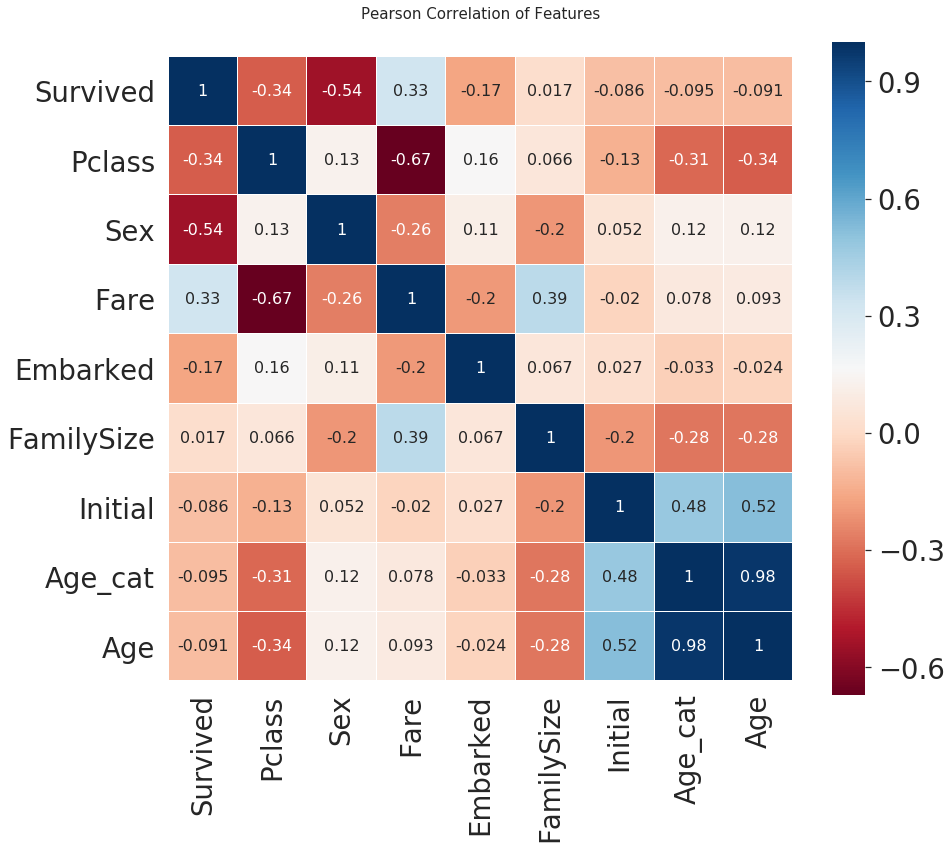

In [122]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat', 'Age']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

## EDA end

# One hot Encoding

In [123]:
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test,columns=['Initial'], prefix='Initial')

In [124]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,1.981001,NaN,2,2,2,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,4.266662,C85,0,2,3,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,2.070022,NaN,2,1,2,0,1,0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,3.972177,C123,2,2,3,0,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,2.085672,NaN,2,1,3,0,0,1,0,0


In [125]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test,columns=['Embarked'],prefix='Embarked')

In [126]:
df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)
df_test.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin'],axis=1,inplace=True)

In [127]:
df_train.head()

,Survived,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,22.0,1.981001,2,2,0,0,1,0,0,0,0,1
1,1,1,0,38.0,4.266662,2,3,0,0,0,1,0,1,0,0
2,1,3,0,26.0,2.070022,1,2,0,1,0,0,0,0,0,1
3,1,1,0,35.0,3.972177,2,3,0,0,0,1,0,0,0,1
4,0,3,1,35.0,2.085672,1,3,0,0,1,0,0,0,0,1


In [128]:
df_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
Fare          float64
FamilySize      int64
Age_cat         int64
Initial_0       uint8
Initial_1       uint8
Initial_2       uint8
Initial_3       uint8
Initial_4       uint8
Embarked_0      uint8
Embarked_1      uint8
Embarked_2      uint8
dtype: object

In [129]:
df_test.head()

,Pclass,Sex,Age,Fare,FamilySize,Age_cat,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,Embarked_0,Embarked_1,Embarked_2
0,3,1,34.5,7.8292,1.0,3,0,0,1,0,0,0,1,0
1,3,0,47.0,7.0000,2.0,4,0,0,0,1,0,0,0,1
2,2,1,62.0,9.6875,1.0,6,0,0,1,0,0,0,1,0
3,3,1,27.0,8.6625,1.0,2,0,0,1,0,0,0,0,1
4,3,0,22.0,12.2875,2.0,2,0,0,0,1,0,0,0,1


In [133]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [134]:
x_train = df_train.drop('Survived',axis=1).values
target_label = df_train['Survived'].values
x_test = df_test.values

In [135]:
x_train.shape,x_test.shape

((891, 14), (418, 14))

In [136]:
x_tr,x_vld,y_tr,y_vld = train_test_split(x_train,target_label,test_size=0.2,random_state=2018)

In [137]:
y_tr.shape,y_vld.shape

((712,), (179,))

# Model Gen. & Prediction

In [138]:
model = RandomForestClassifier()
model.fit(x_tr,y_tr)
prediction = model.predict(x_vld)

In [139]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 179명 중 81.56% 정확도로 생존을 맞춤


In [140]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

In [ ]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()